In [91]:
import polars as pl

from image2biomass.config import RAW_DATA_DIR

train_df = pl.read_csv(RAW_DATA_DIR / "train.csv")

In [92]:
train_df.shape

(1785, 9)

In [93]:
train_df.head()

sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
str,str,str,str,str,f64,f64,str,f64
"""ID1011485656__Dry_Clover_g""","""train/ID1011485656.jpg""","""2015/9/4""","""Tas""","""Ryegrass_Clover""",0.62,4.6667,"""Dry_Clover_g""",0.0
"""ID1011485656__Dry_Dead_g""","""train/ID1011485656.jpg""","""2015/9/4""","""Tas""","""Ryegrass_Clover""",0.62,4.6667,"""Dry_Dead_g""",31.9984
"""ID1011485656__Dry_Green_g""","""train/ID1011485656.jpg""","""2015/9/4""","""Tas""","""Ryegrass_Clover""",0.62,4.6667,"""Dry_Green_g""",16.2751
"""ID1011485656__Dry_Total_g""","""train/ID1011485656.jpg""","""2015/9/4""","""Tas""","""Ryegrass_Clover""",0.62,4.6667,"""Dry_Total_g""",48.2735
"""ID1011485656__GDM_g""","""train/ID1011485656.jpg""","""2015/9/4""","""Tas""","""Ryegrass_Clover""",0.62,4.6667,"""GDM_g""",16.275


In [94]:
train_df.group_by("image_path").agg(pl.len()).filter(pl.col("len") != 5).show()

image_path,len
str,u32


In [95]:
expected = [
    "Dry_Clover_g",
    "Dry_Dead_g",
    "Dry_Green_g",
    "Dry_Total_g",
    "GDM_g",
]

train_df.group_by("image_path").agg(pl.col("target_name").unique().alias('target_name')).with_columns(
    (pl.col("target_name").list.sort() ==
           pl.lit(sorted(expected))).alias("is_valid")
).filter(~pl.col("is_valid")).show()

image_path,target_name,is_valid
str,list[str],bool


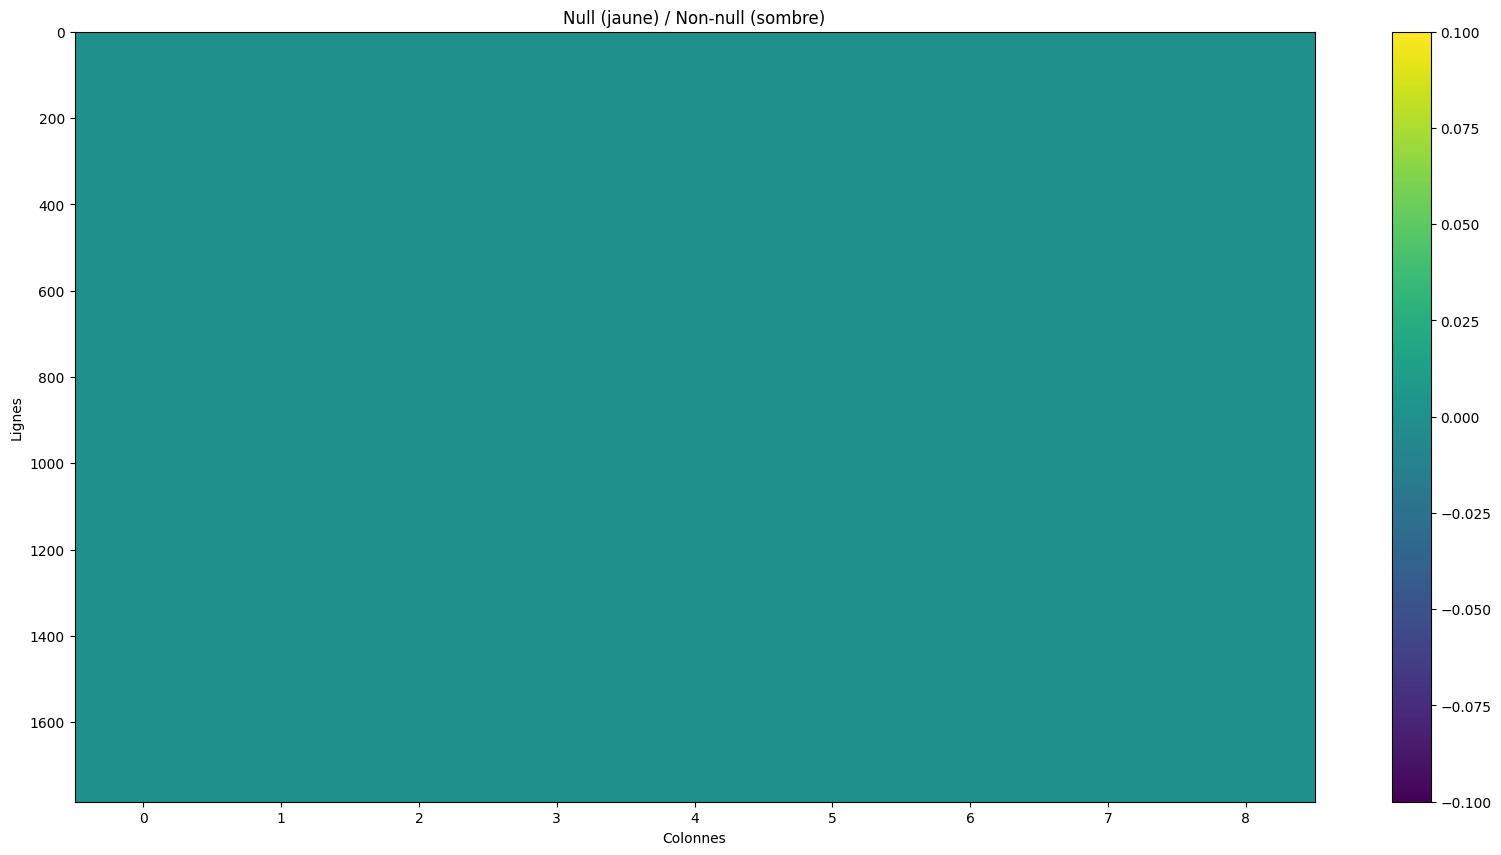

In [96]:
import matplotlib.pyplot as plt

# Suppose que df est ton DataFrame
mask = train_df.select(pl.all().is_null())

plt.figure(figsize=(20, 10))
plt.imshow(mask, aspect='auto', interpolation='none')
plt.xlabel("Colonnes")
plt.ylabel("Lignes")
plt.title("Null (jaune) / Non-null (sombre)")
plt.colorbar()
plt.show()

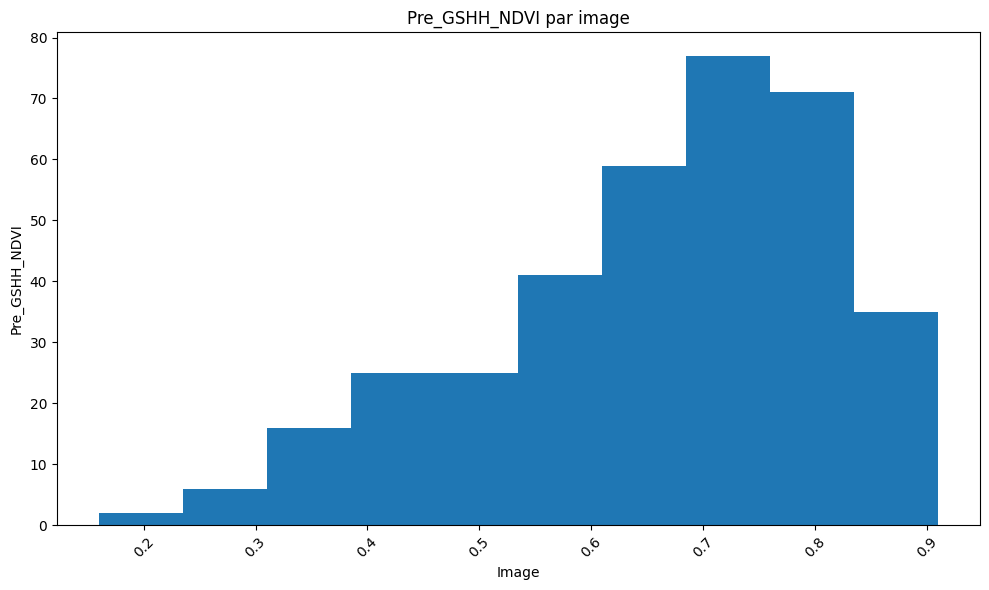

In [97]:
import matplotlib.pyplot as plt

Pre_GSHH_NDVI = train_df.select(pl.col(["image_path", "Pre_GSHH_NDVI"])).group_by(
    "image_path"
).agg(pl.first("Pre_GSHH_NDVI").alias("Pre_GSHH_NDVI"))

plt.figure(figsize=(10, 6))
plt.hist(Pre_GSHH_NDVI['Pre_GSHH_NDVI'])
plt.title("Pre_GSHH_NDVI par image")
plt.xlabel("Image")
plt.ylabel("Pre_GSHH_NDVI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

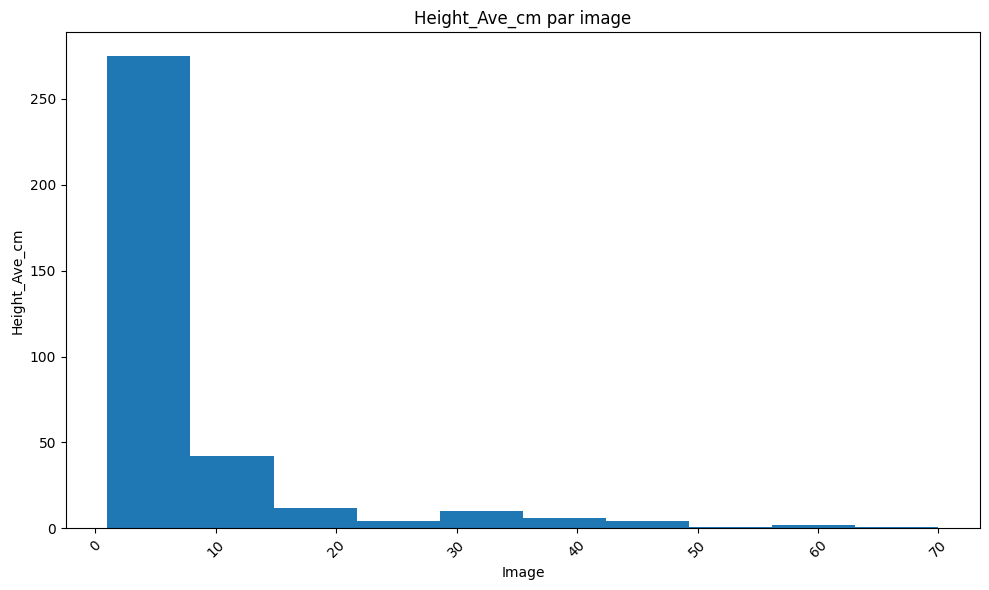

In [86]:

import matplotlib.pyplot as plt

Height_Ave_cm = train_df.select(pl.col(["image_path", "Height_Ave_cm"])).group_by(
    "image_path"
).agg(pl.first("Height_Ave_cm").alias("Height_Ave_cm"))

plt.figure(figsize=(10, 6))
plt.hist(Height_Ave_cm['Height_Ave_cm'])
plt.title("Height_Ave_cm par image")
plt.xlabel("Image")
plt.ylabel("Height_Ave_cm")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
df = train_df.select(pl.col('Sampling_Date').str.to_datetime(format="%Y/%m/%d")).sort('Sampling_Date')

<BarContainer object of 10 artists>

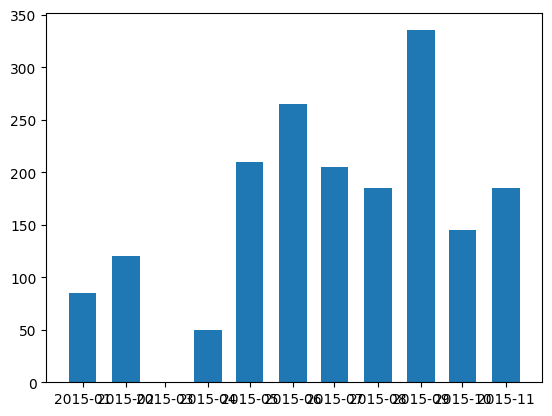

In [72]:
freq_by_month = (
    df.group_by_dynamic(
        index_column="Sampling_Date",
        every="1mo",       # intervalle = 1 mois
        closed="left",     # inclut le début du mois
    )
    .agg(pl.len().alias("Frequency"))
    .sort("Sampling_Date")
)

plt.bar(freq_by_month['Sampling_Date'], freq_by_month['Frequency'], width=20)

In [83]:
freq_by_month = (
    df.group_by_dynamic(
        index_column="Sampling_Date",
        every="1mo",       # intervalle = 1 mois
        closed="left",     # inclut le début du mois
    )
    .agg(pl.col("Sampling_Date").first().dt.year().alias("Year"),
))

freq_by_month['Year'].unique()

Year
i32
2015


<BarContainer object of 4 artists>

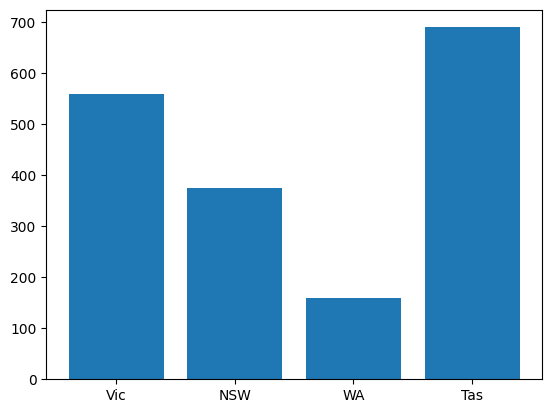

In [62]:
df = train_df.select(pl.col('State'))

freq_by_month = (
    df.group_by("State").agg(pl.len().alias("Frequency"))
)

plt.bar(freq_by_month['State'], freq_by_month['Frequency'])

In [11]:
train_df['State'].unique()

State
str
"""Vic"""
"""NSW"""
"""WA"""
"""Tas"""


/var/folders/nt/t7h_jdls53g7f4km7fzlx00c0000gn/T/ipykernel_44019/2350539903.py:4: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)



<BarContainer object of 15 artists>

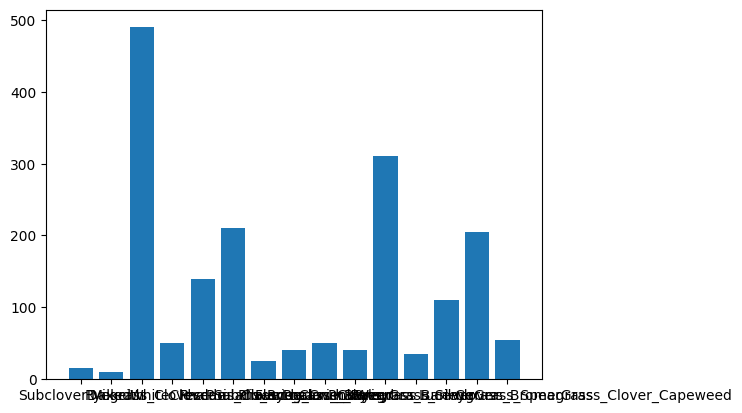

In [109]:

species_freq = train_df.group_by(
    pl.col('Species')
).agg(
    pl.count().alias('Counts')
)

plt.bar(species_freq['Species'], species_freq['Counts'])

In [6]:
import numpy as np
from image2biomass import metrics


metrics.weighted_r2(
    np.array([0.5, 0.4]),
    np.array([0.6, 0.2]),
    np.array([0.5, 0.5])
)

0.45 1.0 [0.5 0.4] 0.45 [ 0.05 -0.05]
0.025 0.0024999999999999988


np.float64(-9.000000000000005)

In [9]:
from image2biomass.config import PROCESSED_DATA_DIR
from image2biomass.modeling.models.sklearn_gboost_regressor import SkLearnGradientBoostingRegressor
from image2biomass.modeling.train import get_Xy_from_csv

features_path = PROCESSED_DATA_DIR / "features_dinov2_small.csv"
labels_path = PROCESSED_DATA_DIR / "train.csv"

X, y, sample_weights = get_Xy_from_csv(
        features_csv=features_path,
        labels_csv=labels_path,
    )

model = SkLearnGradientBoostingRegressor().fit(X, y)



2026-01-06 01:40:13.071 | INFO     | image2biomass.modeling.train:get_Xy_from_csv:24 - Loading features from /Users/gaetan/Projects/kaggle/image2biomass/data/processed/features_dinov2_small.csv
2026-01-06 01:40:13.103 | INFO     | image2biomass.modeling.train:get_Xy_from_csv:27 - Loading labels from /Users/gaetan/Projects/kaggle/image2biomass/data/processed/train.csv


(1785,)

In [10]:
res = model.predict(X)


In [13]:
res

array([23.05899274, 23.05899274, 23.05899274, ..., 25.72621065,
       25.72621065, 25.72621065], shape=(1785,))

In [20]:
from sklearn.metrics import r2_score

r2_score(
    y,
    res,
    sample_weight=sample_weights[:, 0]
)

0.41236291690792226

In [21]:
metrics.weighted_r2(
    y,
    res,
    sample_weight=sample_weights[:, 0]
)

33.845833 356.99997 [ 0.     31.9984 16.2751 ... 40.94   40.94   40.94  ] 12082.961 [-33.845833   -1.8474331 -17.570732  ...   7.094166    7.094166
   7.094166 ]
168116.03845216305 286088.2


np.float64(0.4123628804067171)

In [23]:
def weighted_r2(y_true, y_pred, sample_weight):
    w_sum = np.sum(sample_weight)
    print((sample_weight * y_true).shape)
    y_w_mean = np.sum(sample_weight * y_true) / w_sum

    ss_res = np.sum(sample_weight * (y_true - y_pred) ** 2)
    ss_tot = np.sum(sample_weight * (y_true - y_w_mean) ** 2)

    return 1 - (ss_res / ss_tot)

weighted_r2(
    y,
    res,
    sample_weight=sample_weights
)

(1785, 1785)


np.float64(0.9999997852513114)